2.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22522 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20877 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29983 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29987 missing from c

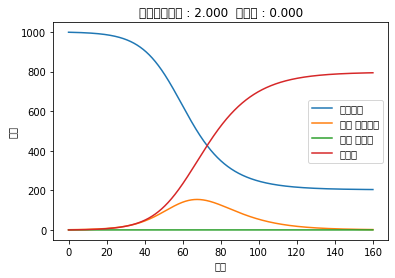

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#import sys

def SIQR(v, t, beta, gamma, p):
    """
    Define the SIQR model.
    
    Parameters
    ----------------
    v: list
        v = [S, I, Q, R]
        S: 未感染者
        I: 市中感染者
        Q: 隔離者
        R: 回復(抗体保持)
    t: float
        represent time. need for scipy.odeint.
    beta: float
        感染割合
    gamma: float
        回復割合
    p: float
        隔離率
    
    Returns
    -----------
    rvalue: list
        rvalue = [S', I', Q', R']
    """
    q = 0.0
    rvalue = [0,0,0,0]
    beta_ss_ii = beta * v[0] * v[1]
    rvalue[0] = - beta_ss_ii
    rvalue[1] = (1 - q) * beta_ss_ii - p * v[1] - gamma * v[1]
    rvalue[2] = q * beta_ss_ii + p * v[1] - gamma * v[2]
    rvalue[3] = gamma * v[1] + gamma * v[2]
    return rvalue




def calc_proc(times, beta_const, gamma_const, p):
    """
    数値計算 using odeint.
    
    Parameter
    --------------
    
    
    Returns
    -----------
    R0: float
        基本再生産数. 感染した1人の感染者が, 
        誰も免疫を持たない集団に加わったとき
        平均して何人に直接感染させる人数.
    
    result: float
        数値計算の結果.
        
    """
    S_0=999
    I_0=1
    Q_0=0
    R_0=0
    ini_state = [S_0,I_0,Q_0,R_0]

    args  =(beta_const, gamma_const, p)

    N_total = S_0 + I_0 + Q_0 + R_0
    
    R0 = N_total * beta_const * (1/gamma_const)
    print(R0)
    
    result = odeint(SIQR, ini_state, times, args)
    return R0,result


def plot(R0, p, times, result):
    str_out = "基本再生産数 : {}".format(format(R0, ".3f"))
    str_out += "  "
    str_out += "隔離率 : {}".format(format(p, ".3f"))
    plt.title(str_out)
    plt.xlabel('日数')
    plt.ylabel('人数')
    plt.plot(times,result)
    plt.legend(['未感染者','感染 非隔離者','感染 隔離者','回復者'])
    plt.show()


if __name__ == "__main__":
    #sys.stderr.write("*** start ***\n")
    t_max = 160
    dt = 0.01
    beta_const = 0.2/1000
    gamma_const = 0.1
    p = 0.0
    
    #sys.stderr.write("p_kakuri = %.3f\n" % p)

    times =np.arange(0,t_max, dt)
    R0,result = calc_proc(times,beta_const,gamma_const,p)

    plot(R0,p,times,result)
#
    #sys.stderr.write("*** end ***\n")


